In [1]:
%matplotlib inline
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 12 23:56:37 2016

@author: tabacof
"""

import pystan
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

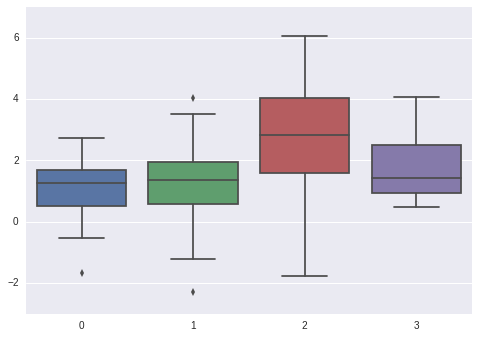

In [2]:
N = 20
K = 4
y = np.random.normal(1.0, size = (N, K))
y[:, 1] *= 2.0
y[:, 2] += 1.0
y[:, 2] *= 2.0
y[:, 3] += 1.0

sns.boxplot(data = y)
plt.show()

In [ ]:
code = '''
data {
    int K; // Number of groups
    int N; // Number of examples per group
    real y[N, K]; // Observations 
}
parameters {
    real mu; // Mean
    vector[K-1] theta_free; // Effects
    real<lower=0> sigma; // Noise std
}
model {
    vector[K] theta;
    theta[1] <- 0.0;
    for (i in 2:K) theta[i] <- theta_free[i-1];
    
    sigma ~ cauchy(0, 100); // Weak noise std prior
    theta_free ~ normal(0, 100); // Weak effect prior
    for (i in 1:N)
        for (j in 1:K)
            y[i][j] ~ normal(mu + theta[j], sigma);
}
'''

data = {
    'K': K,
    'N': N,
    'y': y,
}

fit = pystan.stan(model_code=code, data=data, iter=1000, chains=4)

/home/tabacof/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/home/tabacof/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/home/tabacof/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel instance must be pickled along with this fit object.
When unpickling the StanModel must be unpickled first.
  return send(obj)
/home/tabacof/anaconda2/lib/python2.7/multiprocessing/queues.py:392: UserWarning: Pickling fit objects is an experimental feature!
The relevant StanModel ins

Inference for Stan model: anon_model_a14bc12161845e5e05ded074e3552255.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu               1.1  7.9e-3   0.35    0.4   0.87    1.1   1.33    1.8 2000.0   1.01
theta_free[0]   0.05    0.01    0.5   -0.9  -0.28   0.04   0.39   1.04 2000.0   1.01
theta_free[1]    1.7    0.01   0.51    0.7   1.36   1.71   2.05    2.7 2000.0    1.0
theta_free[2]   0.67    0.01   0.49  -0.28   0.34   0.68   1.01   1.66 2000.0    1.0
sigma           1.57  2.9e-3   0.13   1.34   1.48   1.56   1.64   1.86 2000.0    1.0
lp__          -74.47    0.04    1.6 -78.42 -75.24 -74.15 -73.28 -72.39 2000.0   1.01

Samples were drawn using NUTS(diag_e) at Thu Oct 13 01:29:37 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergen

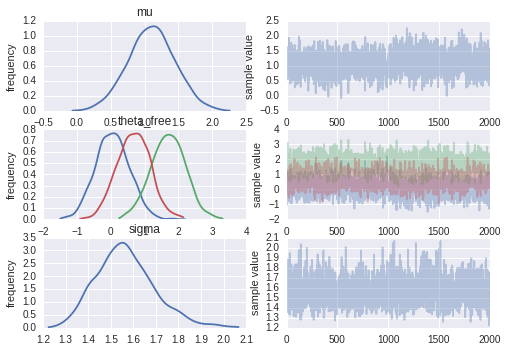

In [9]:
new_fit = pystan.stan(fit=fit, data=data)
print(fit)
fit.plot()
trace = fit.extract()